In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [ ]:
df=pd.read_csv('bank-additional-full.csv',delimiter=';')
df.rename(columns={'y':'deposit'},inplace=True)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,deposit
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
df.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,deposit
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [ ]:
df.shape

(41188, 21)

In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'deposit'],
      dtype='object')

In [ ]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
deposit            object
dtype: object

In [ ]:
df.dtypes.value_counts()

object     11
int64       5
float64     5
Name: count, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [ ]:
df.duplicated().sum()

12

In [ ]:
df.isna().sum()


age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
deposit           0
dtype: int64

In [ ]:
cat_cols=df.select_dtypes(include='object').columns
print(cat_cols)

num_cols=df.select_dtypes(exclude='object').columns
print(num_cols)

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'deposit'],
      dtype='object')
Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')


In [ ]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [ ]:
df.describe(include='object')

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,deposit
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


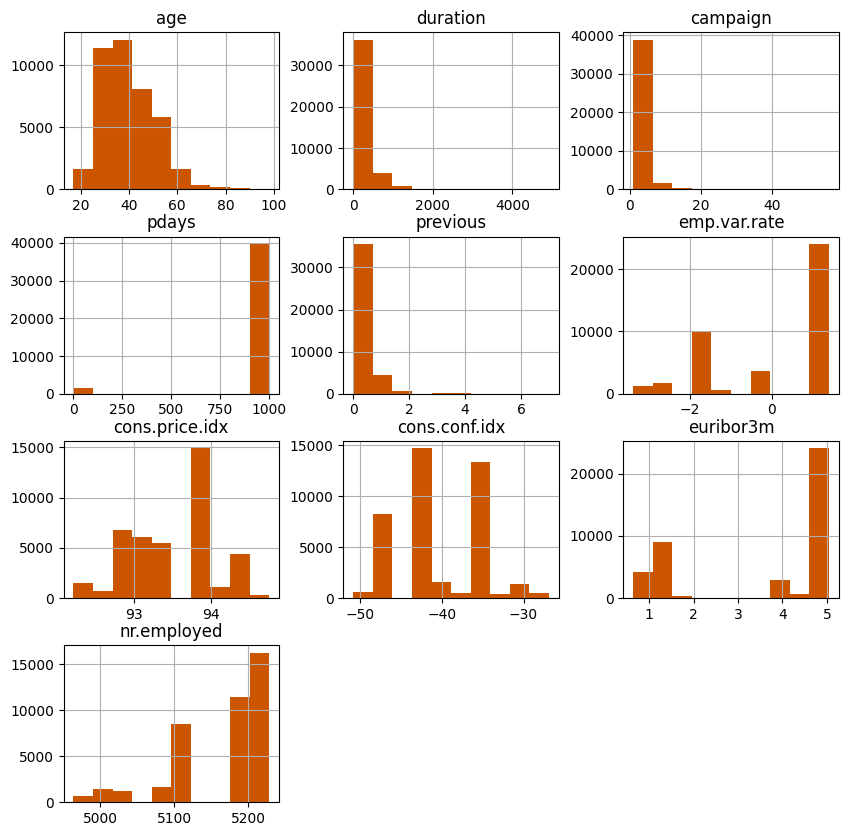

In [ ]:
df.hist(figsize=(10,10),color='#cc5500')
plt.show()

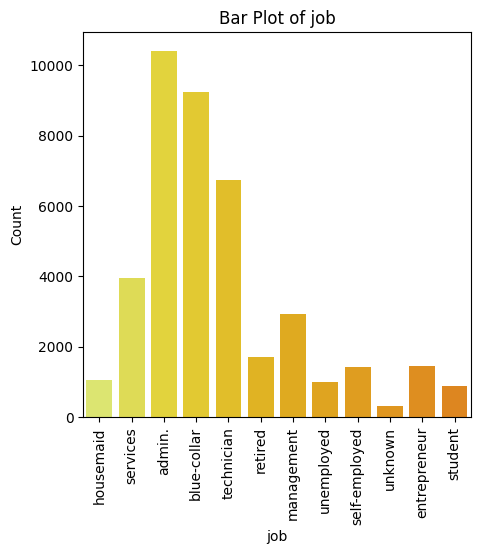

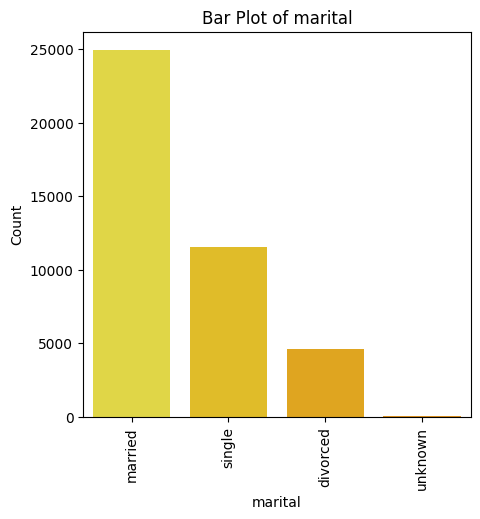

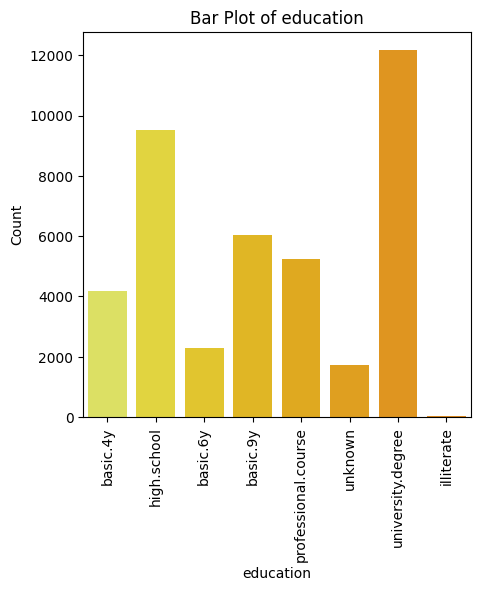

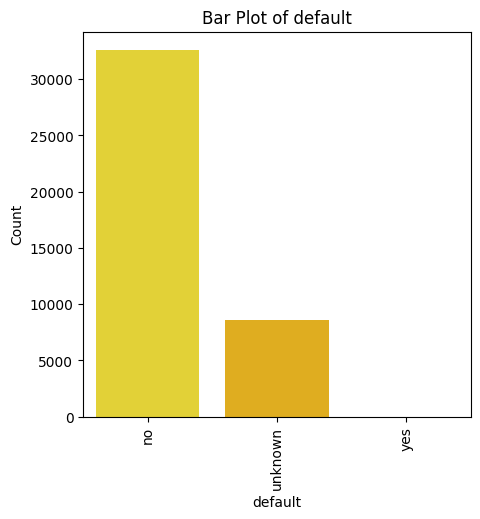

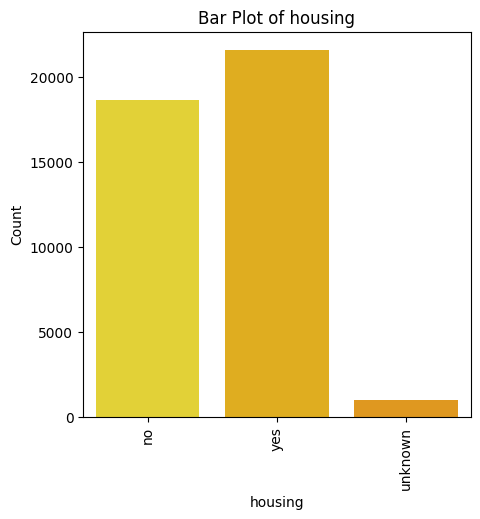

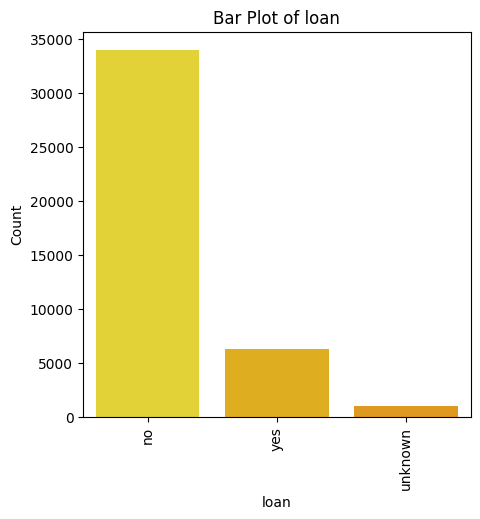

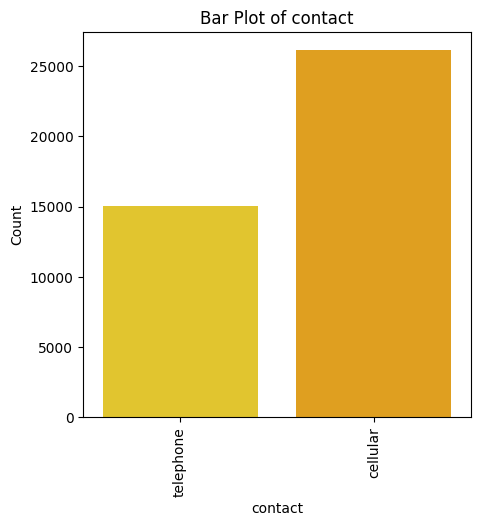

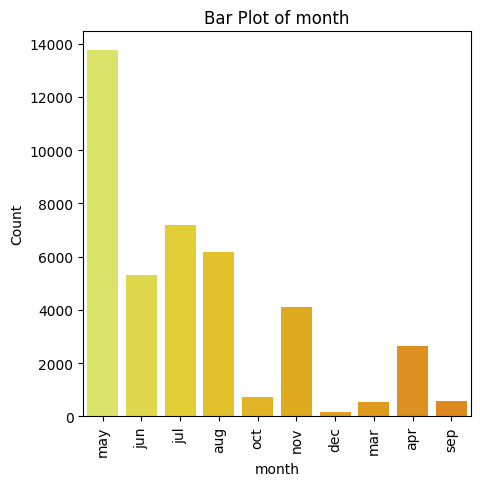

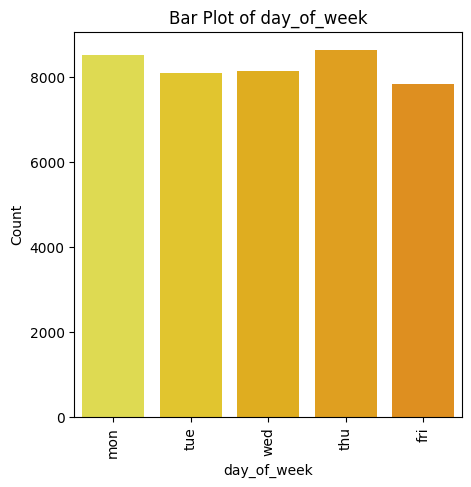

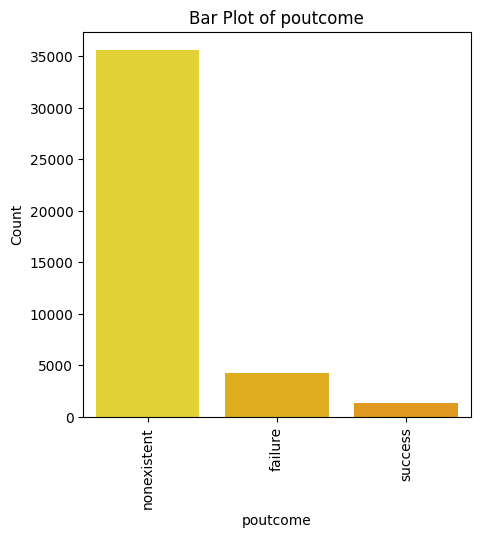

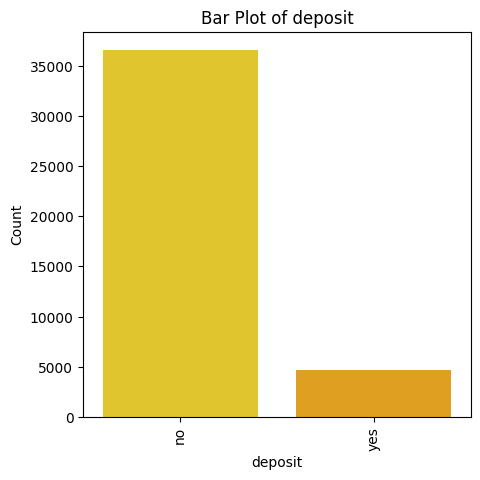

In [ ]:
for feature in cat_cols:
  plt.figure(figsize=(5,5))
  sns.countplot(x=feature,data=df,palette='Wistia')
  plt.title(f'Bar Plot of {feature}')
  plt.xlabel(feature)
  plt.ylabel('Count')
  plt.xticks(rotation=90)
  plt.show()

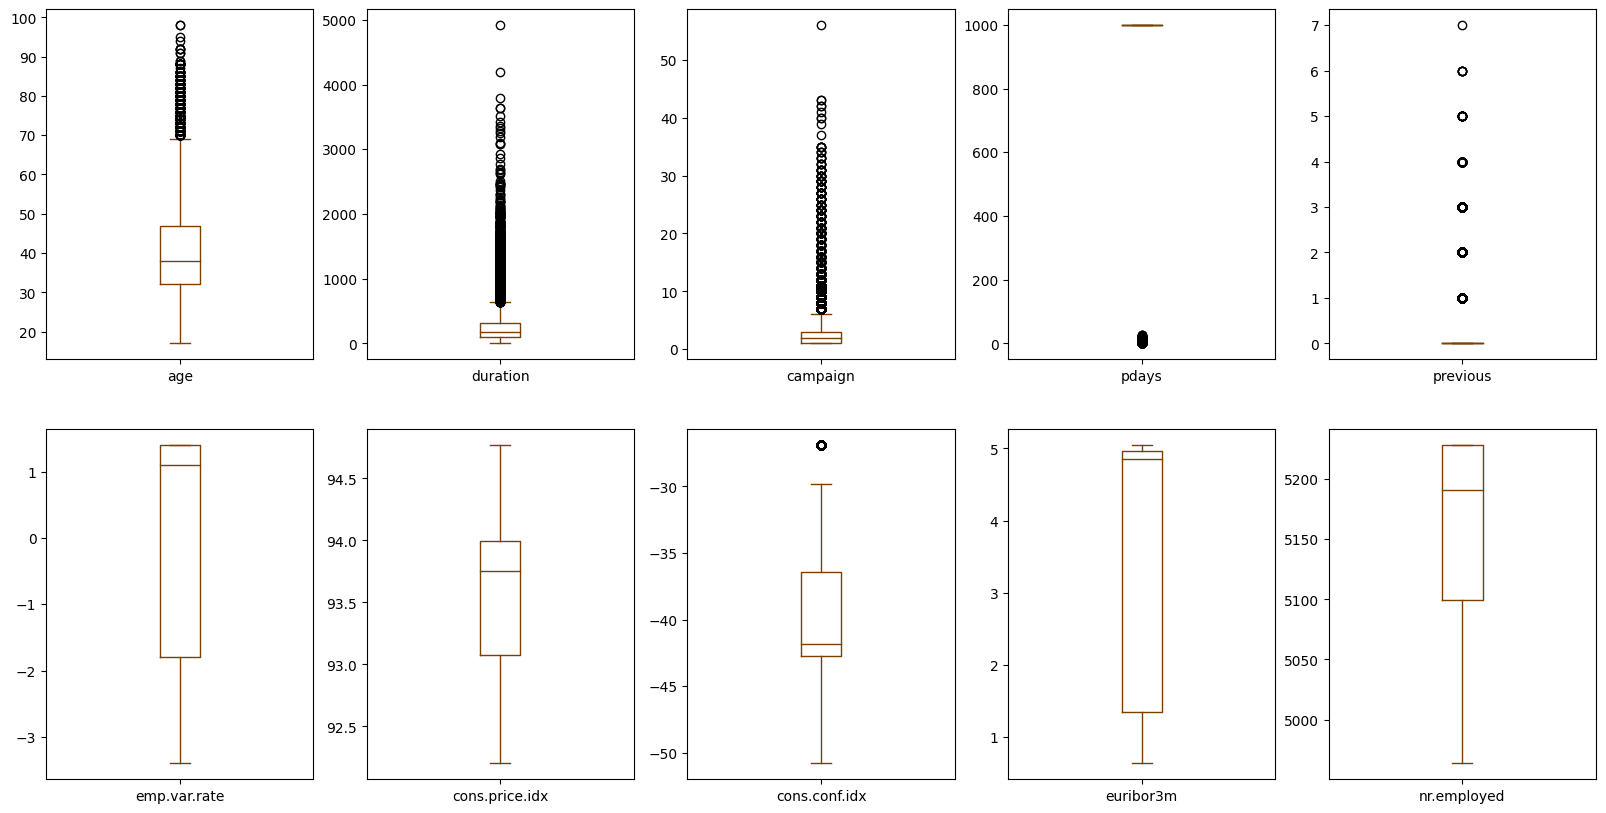

In [ ]:
df.plot(kind='box',subplots=True,layout=(2,5),figsize=(20,10),color='#7b3f00')
plt.show()

In [ ]:
df1=df.copy()
df1.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'deposit'],
      dtype='object')

In [ ]:
df=df.drop("job",axis=1)


In [ ]:
df=df.drop('marital',axis=1)

In [ ]:
df

,age,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,deposit
0,56,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [ ]:
df=df.drop('education',axis=1)

In [ ]:
df=df.drop('default',axis=1)

In [ ]:
df=df.drop('housing',axis=1)

In [ ]:
df=df.drop('loan',axis=1)

In [ ]:
df=df.drop('contact',axis=1)

In [ ]:
df=df.drop('month',axis=1)

In [ ]:
df=df.drop('day_of_week',axis=1)

In [ ]:
df=df.drop('poutcome',axis=1)

In [ ]:
df=df.drop('deposit',axis=1)

                     age  duration  campaign     pdays  previous  \
age             1.000000 -0.000866  0.004594 -0.034369  0.024365   
duration       -0.000866  1.000000 -0.071699 -0.047577  0.020640   
campaign        0.004594 -0.071699  1.000000  0.052584 -0.079141   
pdays          -0.034369 -0.047577  0.052584  1.000000 -0.587514   
previous        0.024365  0.020640 -0.079141 -0.587514  1.000000   
emp.var.rate   -0.000371 -0.027968  0.150754  0.271004 -0.420489   
cons.price.idx  0.000857  0.005312  0.127836  0.078889 -0.203130   
cons.conf.idx   0.129372 -0.008173 -0.013733 -0.091342 -0.050936   
euribor3m       0.010767 -0.032897  0.135133  0.296899 -0.454494   
nr.employed    -0.017725 -0.044703  0.144095  0.372605 -0.501333   

                emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
age                -0.000371        0.000857       0.129372   0.010767   
duration           -0.027968        0.005312      -0.008173  -0.032897   
campaign            0.150754 

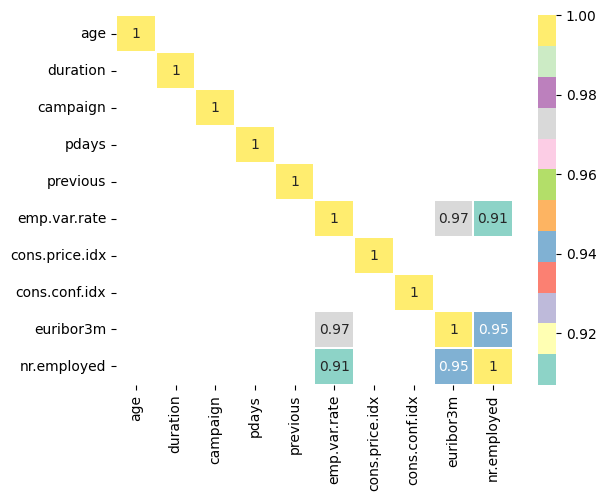

In [ ]:
corr=df.corr()
print(corr)
corr=corr[abs(corr)>=0.90]
sns.heatmap(corr,annot=True,cmap='Set3',linewidth=0.2)
plt.show()

In [ ]:
high_corr_cols=['emp.var.rate','euribor3m','nr.employed']

In [ ]:
df1.drop(high_corr_cols,inplace=True,axis=1)
df1.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'cons.price.idx', 'cons.conf.idx', 'deposit'],
      dtype='object')

In [ ]:
df1.shape

(41188, 18)

In [ ]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
df_encoded = df1.apply(lb.fit_transform)
df_encoded

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,cons.price.idx,cons.conf.idx,deposit
0,39,3,1,0,0,0,0,1,6,1,261,0,26,0,1,18,16,0
1,40,7,1,3,1,0,0,1,6,1,149,0,26,0,1,18,16,0
2,20,7,1,3,0,2,0,1,6,1,226,0,26,0,1,18,16,0
3,23,0,1,1,0,0,0,1,6,1,151,0,26,0,1,18,16,0
4,39,7,1,3,0,0,2,1,6,1,307,0,26,0,1,18,16,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,56,5,1,5,0,2,0,0,7,0,334,0,26,0,1,25,0,1
41184,29,1,1,5,0,0,0,0,7,0,383,0,26,0,1,25,0,0
41185,39,5,1,6,0,2,0,0,7,0,189,1,26,0,1,25,0,0
41186,27,9,1,5,0,0,0,0,7,0,442,0,26,0,1,25,0,1


In [ ]:
df_encoded['deposit'].value_counts()

deposit
0    36548
1     4640
Name: count, dtype: int64

In [ ]:
x = df_encoded.drop('deposit',axis=1)  # independent variable
y = df_encoded['deposit']              # dependent variable
print(x.shape)
print(y.shape)
print(type(x))
print(type(y))

(41188, 17)
(41188,)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [ ]:
from sklearn.model_selection import train_test_split



In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(30891, 17)
(10297, 17)
(30891,)
(10297,)


In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

def eval_model(y_test,y_pred):
    acc = accuracy_score(y_test,y_pred)
    print('Accuracy_Score',acc)
    cm = confusion_matrix(y_test,y_pred)
    print('Confusion Matrix\n',cm)
    print('Classification Report\n',classification_report(y_test,y_pred))

def mscore(model):
    train_score = model.score(x_train,y_train)
    test_score = model.score(x_test,y_test)
    print('Training Score',train_score)
    print('Testing Score',test_score)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion='gini',max_depth=5,min_samples_split=10)
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=10)

In [ ]:
mscore(dt)

Training Score 0.9113010261888576
Testing Score 0.9091968534524619


In [ ]:
ypred_dt = dt.predict(x_test)
print(ypred_dt)

[0 0 0 ... 0 0 0]


In [ ]:
eval_model(y_test,ypred_dt)

Accuracy_Score 0.9091968534524619
Confusion Matrix
 [[8863  269]
 [ 666  499]]
Classification Report
               precision    recall  f1-score   support

           0       0.93      0.97      0.95      9132
           1       0.65      0.43      0.52      1165

    accuracy                           0.91     10297
   macro avg       0.79      0.70      0.73     10297
weighted avg       0.90      0.91      0.90     10297



In [ ]:
from sklearn.tree import plot_tree

In [ ]:
cn = ['no','yes']
fn = x_train.columns
print(fn)
print(cn)

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'cons.price.idx', 'cons.conf.idx'],
      dtype='object')
['no', 'yes']


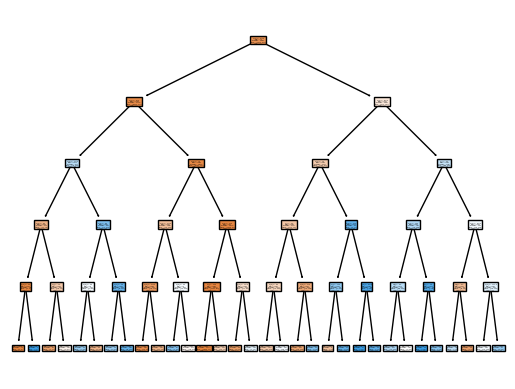

In [ ]:
plot_tree(dt,class_names=cn,filled=True)
plt.show()